<a href="https://colab.research.google.com/github/vedashrith/Data-Science/blob/main/Healthcare_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

## Task1: K-means

Run this cell to read and display top 5 rows of data

In [ ]:
import pandas as pd

cluster_data = pd.read_csv("healthcare-dataset.csv")
cluster_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi
0,1,67.0,0,1,1,2,228.69,36.600000
1,0,61.0,0,0,1,3,202.21,28.893237
2,1,80.0,0,1,1,2,105.92,32.500000
3,0,49.0,0,0,1,2,171.23,34.400000
4,0,79.0,1,0,1,3,174.12,24.000000


### Part 1A: 5 points
Check if there are any missing values. If yes, fill them with appropriate methods. Regardless of any action, explain your decision for the action.

In [ ]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                5110 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 319.5 KB


In [ ]:
cluster_data.isna().sum()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
dtype: int64

There are no missing values in the dataset, which can be verified by using code snippet above.

### Part 1B: 5 points

Map the categorical data for further processing.

In [ ]:
gen_map = {0: 'Female', 1: 'Male', 2: 'Other'}
ht_map = {0: 'No', 1: 'Yes'}
hd_map = {0: 'No', 1: 'Yes'}
m_map = {0: 'No', 1: 'Yes'}
wk_map = {0: 'Unemployed', 1: 'Self-employed', 2: 'Private', 3: 'Govt_job', 4: 'Children'}

cluster_data['gender'] = cluster_data['gender'].map(gen_map)
cluster_data['hypertension'] = cluster_data['hypertension'].map(ht_map)
cluster_data['heart_disease'] = cluster_data['heart_disease'].map(hd_map)
cluster_data['ever_married'] = cluster_data['ever_married'].map(m_map)
cluster_data['work_type'] = cluster_data['work_type'].map(wk_map)



In [ ]:
cluster_data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi
0,Male,67.0,No,Yes,Yes,Private,228.69,36.600000
1,Female,61.0,No,No,Yes,Govt_job,202.21,28.893237
2,Male,80.0,No,Yes,Yes,Private,105.92,32.500000
3,Female,49.0,No,No,Yes,Private,171.23,34.400000
4,Female,79.0,Yes,No,Yes,Govt_job,174.12,24.000000


### Part 1B: 5 points

Scale the data for further processing. Display the processed data. Explain your actions.

In [ ]:
from sklearn.preprocessing import StandardScaler

num = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()

cluster_data[num] = scaler.fit_transform(cluster_data[num])

cluster_data.head()



,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi
0,Male,1.051434,No,Yes,Yes,Private,2.706375,1.001234e+00
1,Female,0.786070,No,No,Yes,Govt_job,2.121559,-2.239854e-10
2,Male,1.626390,No,Yes,Yes,Private,-0.005028,4.685773e-01
3,Female,0.255342,No,No,Yes,Private,1.437358,7.154182e-01
4,Female,1.582163,Yes,No,Yes,Govt_job,1.501184,-6.357112e-01


Standard Scaler is imported from sklearn. Next the numerical columns are selected to apply scaling. It is done by using fit_transform method.The transformed data is displayed using .head().

### Part 1C: 15 points

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 2 to 7 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters).

Explain from the graph which is the most appropriate value for k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

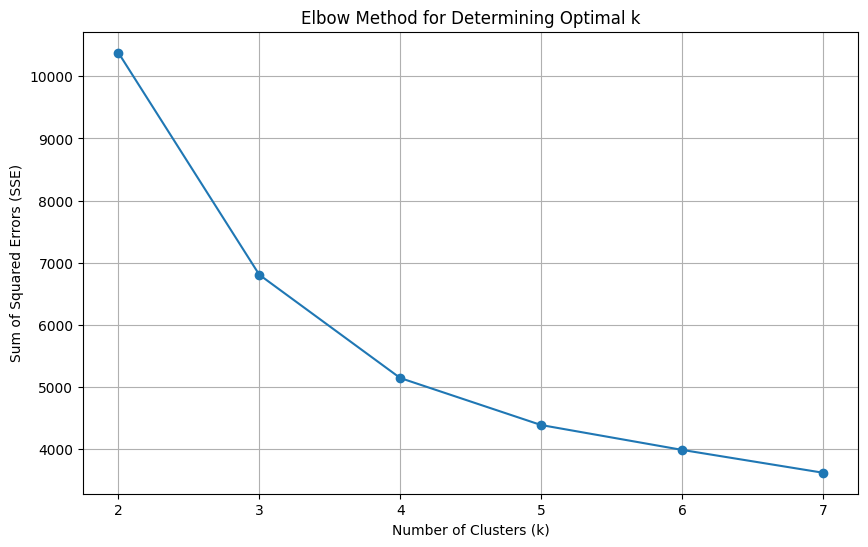

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = range(2, 8)

sse = []

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(cluster_data[num])
    sse.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k, sse, marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


From the above graph we can say that 4 should be k value. At the point 4, the rate of decrease in sse is notably declining. so taking k as 4 would help segment the data without overfitting.

### Part 1D: 10 points

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2-7). Explain which K value you selected from the results and why?

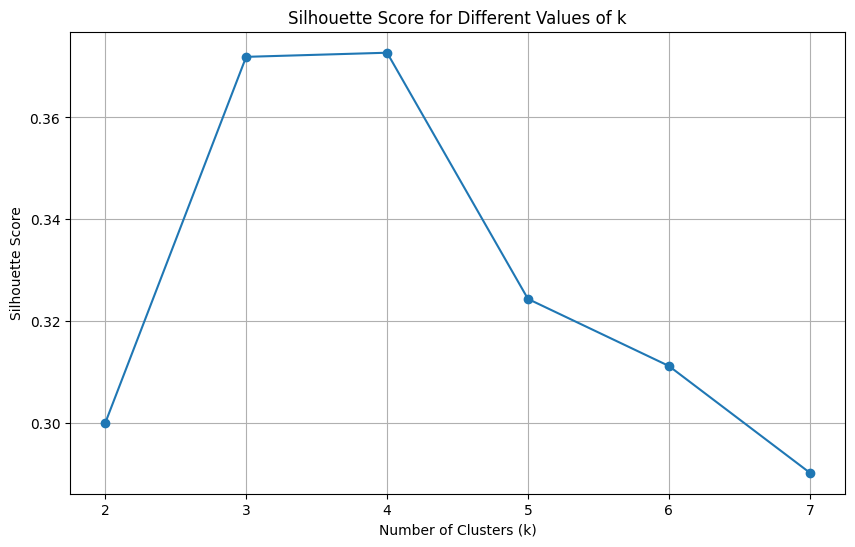

[0.2999550071802483,
 0.3719092655448935,
 0.3727191218413891,
 0.32433277034617014,
 0.3111585259786336,
 0.2901804502034045]

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in k:
    ksil = KMeans(n_clusters=i, n_init=5, random_state=42)
    cluster_labels = ksil.fit_predict(cluster_data[num])
    score = silhouette_score(cluster_data[num], cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

silhouette_scores


Highest score is 0.373 which indicates a strong seperation between clusters for k = 4 when compared to other k values. Also the score decreases for increasing clusters which means that increaing clusters doesnt contribute positively.

### Part 1E: 10 points

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

In [ ]:
kf = KMeans(n_clusters=4, n_init=5, random_state=42)
cluster_data['Cluster_Labels'] = kf.fit_predict(cluster_data[num])

cluster_data.head(len(cluster_data))


,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,Cluster_Labels
0,Male,1.051434,No,Yes,Yes,Private,2.706375,1.001234e+00,2
1,Female,0.786070,No,No,Yes,Govt_job,2.121559,-2.239854e-10,2
2,Male,1.626390,No,Yes,Yes,Private,-0.005028,4.685773e-01,1
3,Female,0.255342,No,No,Yes,Private,1.437358,7.154182e-01,2
4,Female,1.582163,Yes,No,Yes,Govt_job,1.501184,-6.357112e-01,2
...,...,...,...,...,...,...,...,...,...
5105,Female,1.626390,Yes,No,Yes,Private,-0.494658,-2.239854e-10,1
5106,Female,1.670617,No,No,Yes,Govt_job,0.420775,1.442949e+00,3
5107,Female,-0.363842,No,No,Yes,Govt_job,-0.511443,2.217363e-01,3
5108,Male,0.343796,No,No,Yes,Private,1.328257,-4.278451e-01,2


### Part 1F: 10 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [ ]:
cluster_averages = cluster_data.groupby('Cluster_Labels')[num].mean()

cluster_averages


,age,avg_glucose_level,bmi
Cluster_Labels,,,
0,-1.122006,-0.296912,-0.789308
1,0.736058,-0.368146,-0.137516
2,0.764351,2.232268,0.511838
3,-0.081245,-0.349151,1.333424


cluster 0 represents the youngest individuals, they have the below average glucose and bmi compared to other clusters.  
cluster 1 represents older individuals with low glucose levels and relatively normal bmi.  
cluster 2 represents older individuals but has high glucose levels and BMI.  
Cluster 3 represents adults with low glucose levels but highest BMI levels.


## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [ ]:
data = pd.read_csv("hierarchical_data.csv")
data.head()

,X,Y
0,0.816805,0.521645
1,1.618596,-0.379829
2,-0.021270,0.273728
3,-1.021810,-0.075440
4,1.766546,-0.170699


### Part 2A: 5 points

Plot the co-ordinates from the imported data and guess possible clusters that could be formed.

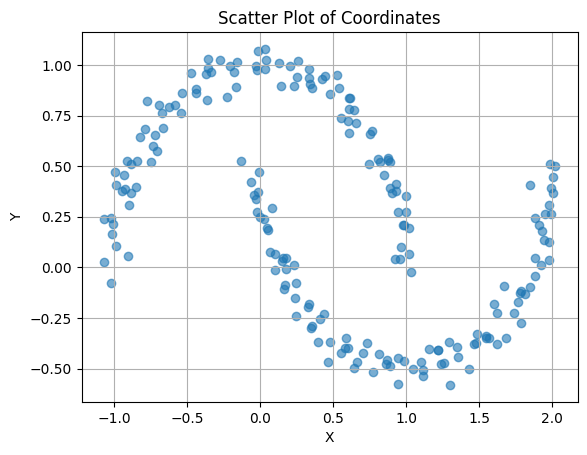

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['X'], data['Y'], alpha=0.6)
plt.title('Scatter Plot of Coordinates')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


Based on the graph above, There can be 3 clusters based on the distance between the points.

### Part 2B: 15 points

Using Hierarchical clustering with euclidean + average and manhattan + average, plot the results for clusters 2 and 3. Add title for each plot.

INTERPRET the results for each combination!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


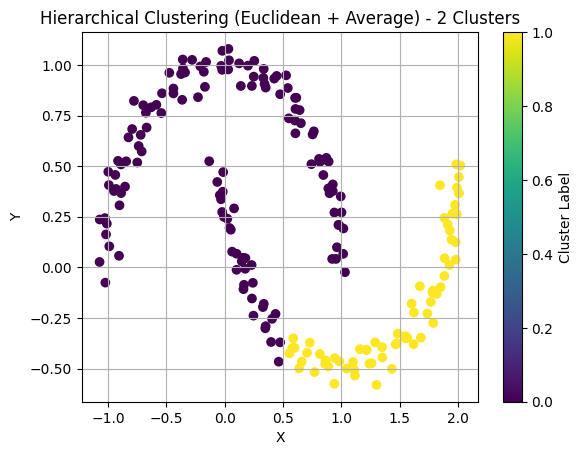

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


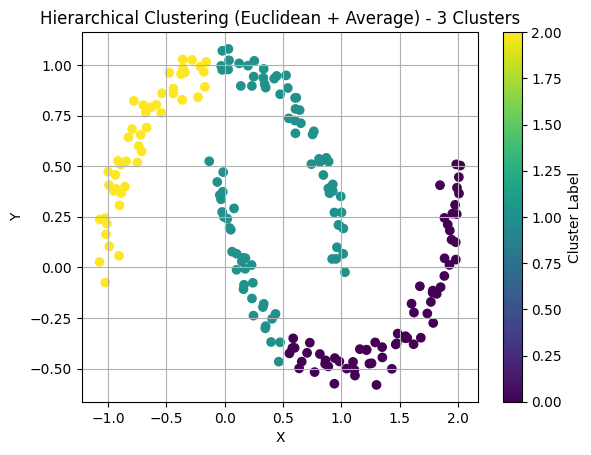

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


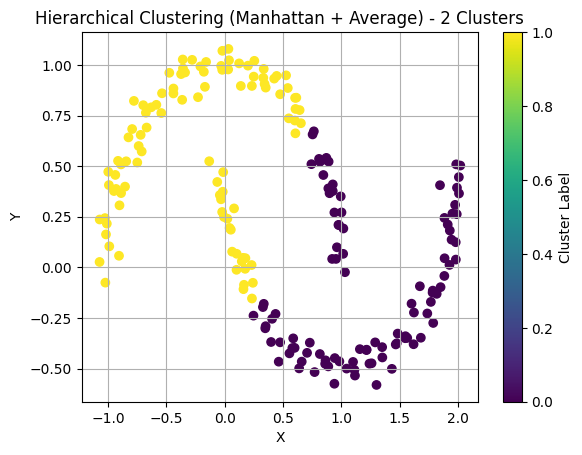

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


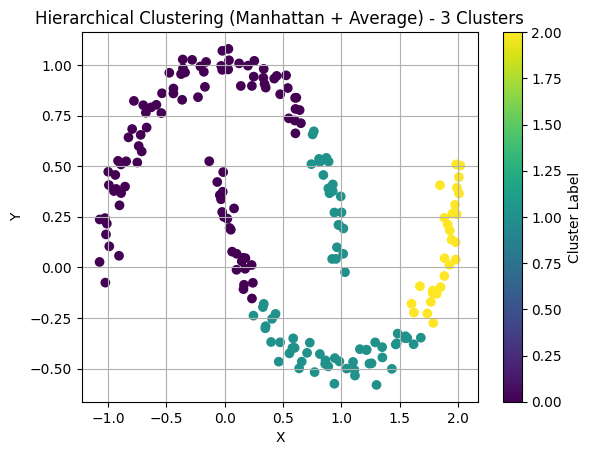

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

def plot_clusters(data, n, link, dist, title):
    linkage_matrix = linkage(data, method=link, metric=dist)

    model = AgglomerativeClustering(n_clusters=n, affinity=dist, linkage=link)
    labels = model.fit_predict(data)

    plt.scatter(data['X'], data['Y'], c=labels, marker='o')
    plt.title(f'{title} - {n} Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar(label='Cluster Label')
    plt.grid(True)
    plt.show()

plot_clusters(data, 2, 'average', 'euclidean', 'Hierarchical Clustering (Euclidean + Average)')
plot_clusters(data, 3, 'average', 'euclidean', 'Hierarchical Clustering (Euclidean + Average)')

plot_clusters(data, 2, 'average', 'cityblock', 'Hierarchical Clustering (Manhattan + Average)')
plot_clusters(data, 3, 'average', 'cityblock', 'Hierarchical Clustering (Manhattan + Average)')


In the first graph, the data is divided into 2 clusters. for the second, the data is divided into 3 clusters(THe  right cluster is split into 2). This is based on the Euclidean distance with average linkage.  
For next 2 graphs, Manhattan distance with average linkage is used. The third graph shows strong seperation between 2 clusters. The next graph shows 3 clusters in which boundaries are clearly seperated.

### Part 2C: 10 points

Heard of Spectral clustering? It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm.

Apply spectral clustering on the data for k=2 and plot the results. Comment on the result and compare it to above results.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


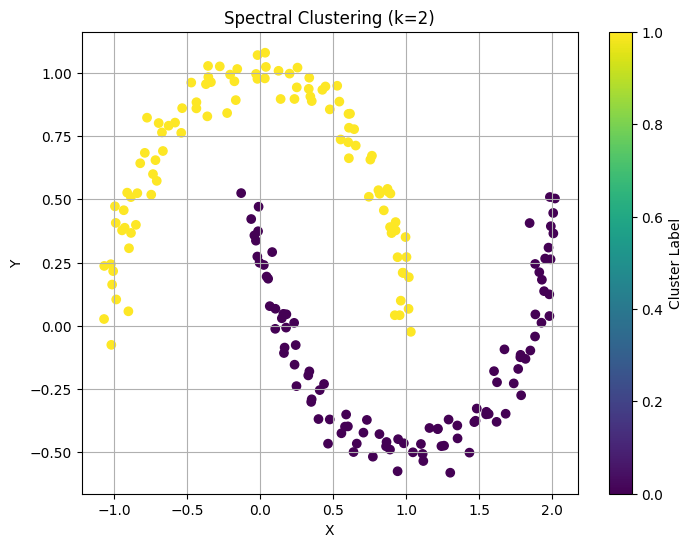

In [ ]:
from sklearn.cluster import SpectralClustering

spec_model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
spec_labels = spec_model.fit_predict(data)

# Plotting the results of Spectral Clustering
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], c=spec_labels, marker='o')
plt.title('Spectral Clustering (k=2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


 The spectral clustering appears to place the division line slightly differently compared to the hierarchical approaches. This indicates the graph-based nature of spectral clustering, showing that the points are connected to their nearest neighbors rather than overall distances.

### Part 2D: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

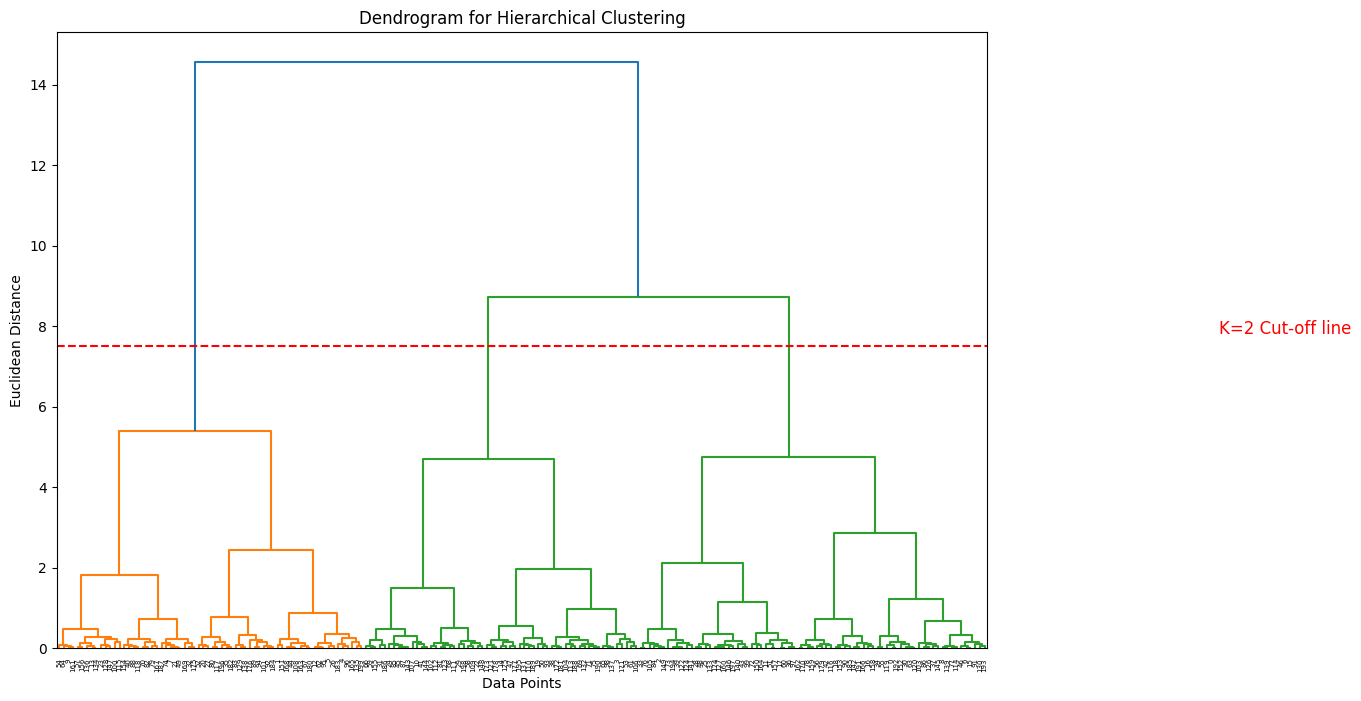

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

lin_mat = linkage(data, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(lin_mat)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')

plt.axhline(y=7.5, color='r', linestyle='--')
plt.text(x=2500, y=7.8, s='K=2 Cut-off line', color='red', fontsize=12)

plt.show()


The placement of the cut-off line for k=2 effectively divides the dataset into two primary groups, suggesting a significant structure in the data at this level of clustering. The dendrogram shows the hierarchical clustering process using the "ward" linkage method. Each vertical line represents a merge operation between clusters, with the height of the merge (the y-axis) indicating the distance at which the merge occurred. The longer the vertical line, the greater the dissimilarity between merged clusters.